# QUERY 1. Persiapan Lingkungan dan Impor Library
#### Memastikan Python terinstal dan library esensial diimpor untuk manipulasi data dan visualisasi:


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# QUERY 2. Pembuatan Data Sintetis
#### Data tabel di atas akan dibuat langsung dalam bentuk DataFrame Pandas. Ini mensimulasikan proses membaca data dari file CSV yang mungkin ada di repositori data riil.

In [9]:
# Data Emisi Aktual (Hipotetis)
data_emisi_aktual = {
    'Tahun': range(2010, 2025),
    'Jumlah_Emisi_Aktual_TonCO2': [
        4_500_000, 4_700_000, 4_900_000, 5_100_000, 5_300_000,
        5_500_000, 5_700_000, 5_900_000, 6_100_000, 6_300_000,
        6_000_000, 6_200_000, 6_400_000, 6_600_000, 6_800_000
    ]
}
df_emisi_aktual = pd.DataFrame(data_emisi_aktual)

# Data Potensi Pengurangan Emisi dengan Biomassa (Hipotetis)
data_pengurangan_biomassa = {
    'Tahun': range(2010, 2025),
    'Potensi_Pengurangan_Emisi_TonCO2': [
        3_500_000, 3_650_000, 3_800_000, 3_950_000, 4_100_000,
        4_250_000, 4_400_000, 4_550_000, 4_700_000, 4_850_000,
        4_600_000, 4_750_000, 4_900_000, 5_050_000, 5_200_000
    ]
}
df_pengurangan_biomassa = pd.DataFrame(data_pengurangan_biomassa)

# Gabungkan kedua DataFrame berdasarkan tahun
df_analisis = pd.merge(df_emisi_aktual, df_pengurangan_biomassa, on='Tahun')

# Hitung Emisi Bersih
df_analisis['Emisi_Bersih_TonCO2'] = df_analisis['Jumlah_Emisi_Aktual_TonCO2'] - df_analisis['Potensi_Pengurangan_Emisi_TonCO2']

# Asumsi harga karbon untuk denda (USD per ton CO2)
HARGA_KARBON_PER_TON = 5 # USD

# Hitung Potensi Denda Emisi yang Dihindari
df_analisis['Potensi_Denda_Dihindari_USD'] = df_analisis['Potensi_Pengurangan_Emisi_TonCO2'] * HARGA_KARBON_PER_TON

print("Data Gabungan untuk Analisis:")
print(df_analisis.to_string(index=False))  # Menampilkan dalam format string
# Menampilkan dalam format markdown table

Data Gabungan untuk Analisis:
 Tahun  Jumlah_Emisi_Aktual_TonCO2  Potensi_Pengurangan_Emisi_TonCO2  Emisi_Bersih_TonCO2  Potensi_Denda_Dihindari_USD
  2010                     4500000                           3500000              1000000                     17500000
  2011                     4700000                           3650000              1050000                     18250000
  2012                     4900000                           3800000              1100000                     19000000
  2013                     5100000                           3950000              1150000                     19750000
  2014                     5300000                           4100000              1200000                     20500000
  2015                     5500000                           4250000              1250000                     21250000
  2016                     5700000                           4400000              1300000                     22000000
  2017            

# QUERY 3. Visualisasi Tren Emisi
#### Menggunakan Matplotlib, kita bisa membuat grafik garis untuk membandingkan tren emisi aktual dengan emisi bersih setelah pemanfaatan biomassa.

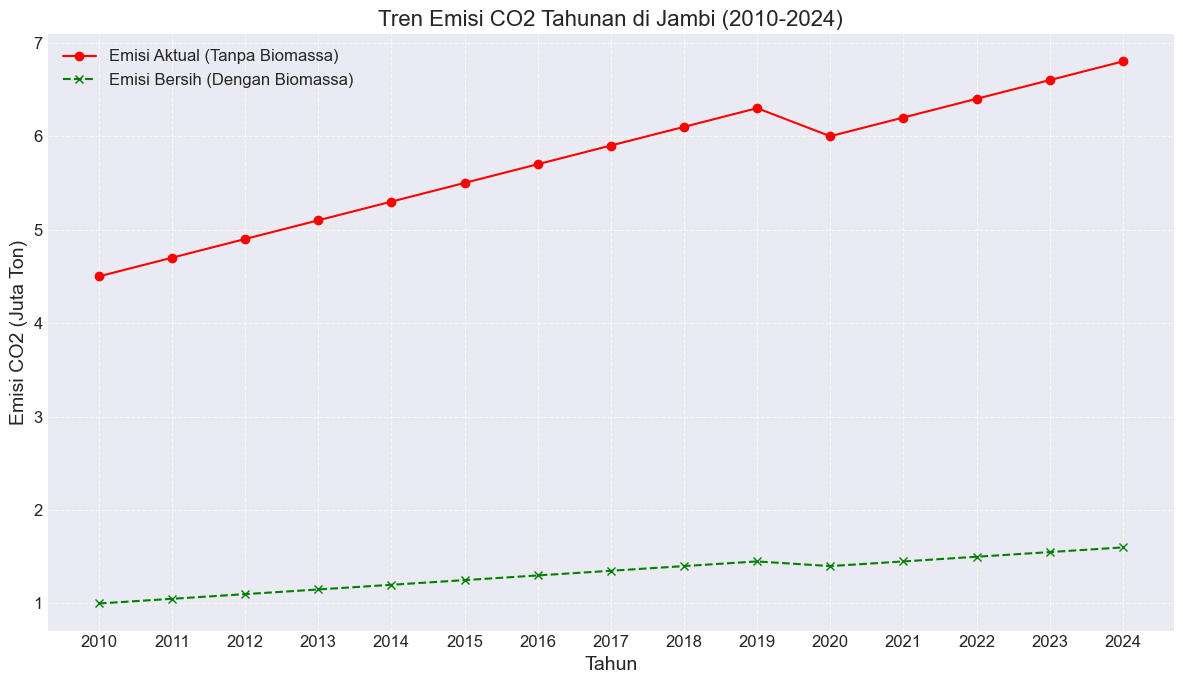

In [7]:
plt.figure(figsize=(12, 7))
plt.plot(df_analisis['Tahun'], df_analisis['Jumlah_Emisi_Aktual_TonCO2'] / 1_000_000,
        marker='o', linestyle='-', color='red', label='Emisi Aktual (Tanpa Biomassa)')
plt.plot(df_analisis['Tahun'], df_analisis['Emisi_Bersih_TonCO2'] / 1_000_000,
        marker='x', linestyle='--', color='green', label='Emisi Bersih (Dengan Biomassa)')

plt.title('Tren Emisi CO2 Tahunan di Jambi (2010-2024)', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Emisi CO2 (Juta Ton)', fontsize=14)
plt.xticks(df_analisis['Tahun'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# QUERY 4. Visualisasi Potensi Pengurangan Emisi dan Penghematan Denda
#### Grafik batang dan garis akan menunjukkan kontribusi biomassa dalam mengurangi emisi dan potensi keuntungan finansial.

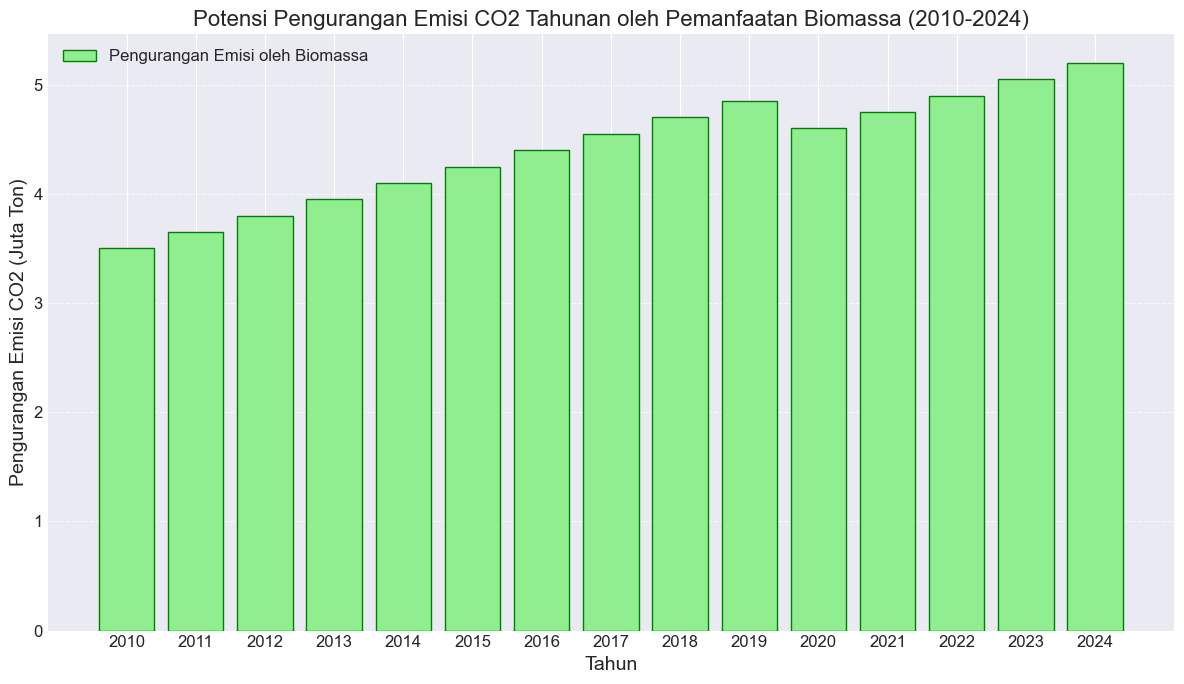

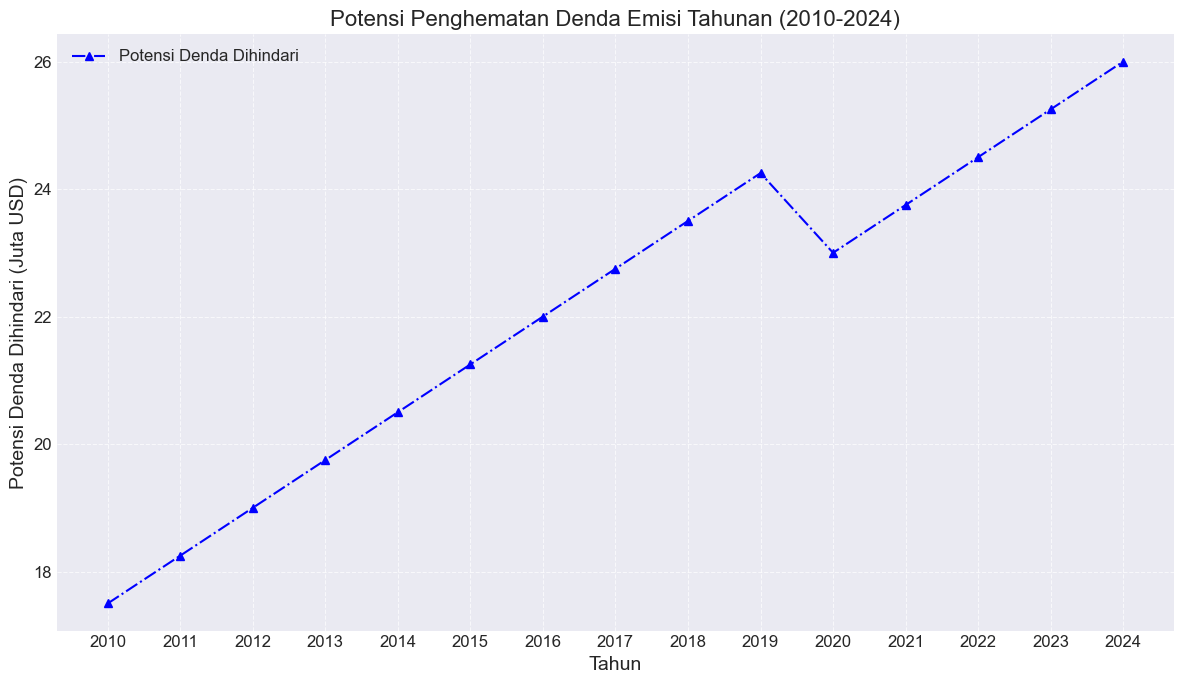

In [10]:
plt.figure(figsize=(12, 7))
plt.bar(df_analisis['Tahun'], df_analisis['Potensi_Pengurangan_Emisi_TonCO2'] / 1_000_000,
        color='lightgreen', edgecolor='green', label='Pengurangan Emisi oleh Biomassa')

plt.title('Potensi Pengurangan Emisi CO2 Tahunan oleh Pemanfaatan Biomassa (2010-2024)', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Pengurangan Emisi CO2 (Juta Ton)', fontsize=14)
plt.xticks(df_analisis['Tahun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(df_analisis['Tahun'], df_analisis['Potensi_Denda_Dihindari_USD'] / 1_000_000,
        marker='^', linestyle='-.', color='blue', label='Potensi Denda Dihindari')

plt.title('Potensi Penghematan Denda Emisi Tahunan (2010-2024)', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Potensi Denda Dihindari (Juta USD)', fontsize=14)
plt.xticks(df_analisis['Tahun'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()